In [1]:
import h5py  # to read the dataset file

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator  # integer pyplot ticks
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

from sklearn import metrics

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision.transforms as tfms
from torchvision import models

from fastai.basics import *
from fastai.vision.all import *

import warnings
warnings.filterwarnings('ignore')

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
file = h5py.File('./datasets/Glitches/trainingsetv1d0.h5', mode='r')
metadata = pd.read_csv('datasets/Glitches/trainingset_v1d0_metadata.csv')
train_metadata = metadata.loc[metadata['sample_type']=='train',['sample_type','gravityspy_id','label']]

In [9]:
labels = sorted(train_metadata['label'].unique())
label = labels[15]
label

'Repeating_Blips'

In [ ]:
GKO71hIVqq
AcCkiBfdtT

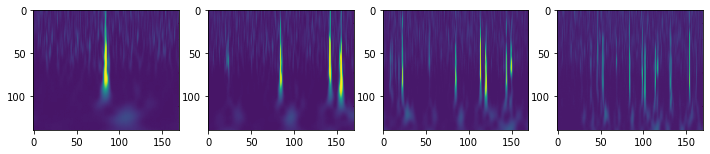

In [18]:
id_ = "AcCkiBfdtT"
views = ["0.5.png", "1.0.png", "2.0.png", "4.0.png"]
fig  = plt.figure(figsize=(12, 6))
for idx, view in enumerate(views):
    plt.subplot(1, 4, idx+1)
    img = file[label]['train'][id_][view][0]
    plt.imshow(img)

In [21]:
view_dict = {
    1: '0.5.png',
    2: '1.0.png',
    3: '2.0.png',
    4: '4.0.png'
}

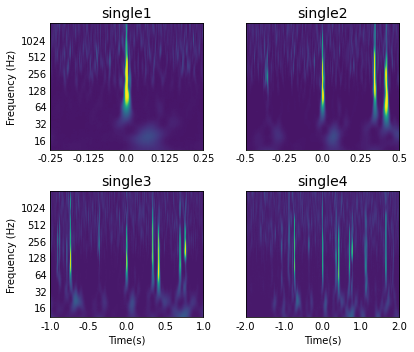

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(6, 5), sharey=True)

freq_pos = np.linspace(-100, 2048, 9)[1:-1]
freqs = np.logspace(3, 11, num=9, base=2)[1:-1]
for idx, view in enumerate(view_dict):
    ax = axes.flat[idx]
    view = view_dict[view]
    view_time = float(view[:3])
    times = np.linspace(-view_time/2, view_time/2, 5)
    img = file[label]['train'][id_][view][0]
    img = ax.imshow(img, extent=[-view_time/2,view_time/2,8,2048], aspect=140/170*view_time/2038)
    ax.set_title(f'single{idx+1}', size=14)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks(times, [f'{float(time)}' for time in times])
    ax.set_yticks(freq_pos, [f'{freq:.0f}' for freq in freqs]);
    #ax.set_xlabel('Time (s)')
    # cbar = plt.colorbar(img, ax=ax, shrink=0.7)
    # if (idx + 1) % 4 == 0:
    #     cbar.set_label('Normalized energy')

for ax in axes[:,0]: ax.set_ylabel('Frequency (Hz)') 
for ax in axes[-1,:]: ax.set_xlabel('Time(s)') 
fig.tight_layout()

fig.savefig('../figs/glitches/03_single_views.png', dpi=300)
#fig.savefig('../figs/glitches/01_glitch_classes.pdf', dpi=300)

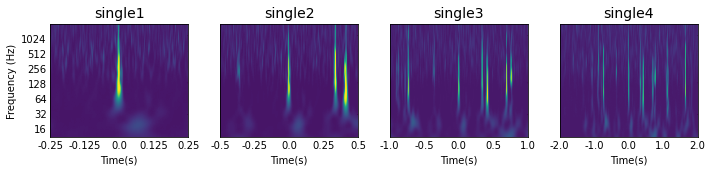

In [75]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=True)

freq_pos = np.linspace(-100, 2048, 9)[1:-1]
freqs = np.logspace(3, 11, num=9, base=2)[1:-1]
for idx, view in enumerate(view_dict):
    ax = axes.flat[idx] 
    view = view_dict[view]
    view_time = float(view[:3])
    times = np.linspace(-view_time/2, view_time/2, 5)
    img = file[label]['train'][id_][view][0]
    img = ax.imshow(img, extent=[-view_time/2,view_time/2,8,2048], aspect=140/170*view_time/2038)
    ax.set_title(f'single{idx+1}', size=14)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks(times, [f'{float(time)}' for time in times])
    ax.set_yticks(freq_pos, [f'{freq:.0f}' for freq in freqs]);
    #ax.set_xlabel('Time (s)')
    # cbar = plt.colorbar(img, ax=ax, shrink=0.7)
    # if (idx + 1) % 4 == 0:
    #     cbar.set_label('Normalized energy')
    
axes[0].set_ylabel('Frequency (Hz)')
for ax in axes: ax.set_xlabel('Time(s)') 
fig.tight_layout()

fig.savefig('../figs/glitches/03_single_views.png', dpi=300)
#fig.savefig('../figs/glitches/01_glitch_classes.pdf', dpi=300)

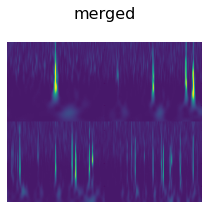

In [88]:
fig = plt.figure(figsize=(3, 3))

view1 = file[label]['train'][id_]["0.5.png"][0]
view2 = file[label]['train'][id_]["1.0.png"][0]
view3 = file[label]['train'][id_]["2.0.png"][0]
view4 = file[label]['train'][id_]["4.0.png"][0]
img = np.vstack((np.hstack((view1, view2)), (np.hstack((view3, view4)))))

plt.imshow(img)
plt.title('merged\n', size=16);
ax = plt.gca()
ax.axis('off')

fig.tight_layout()
fig.savefig('../figs/glitches/03_merged_view.png', dpi=600)

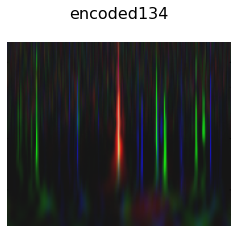

In [92]:
fig = plt.figure(figsize=(4, 4))

chosen_views = '134'
channels = [file[label]['train'][id_][view_dict[int(chosen_view)]][0] for chosen_view in chosen_views]
img = np.array((channels))
plt.imshow(np.moveaxis(img, 0, -1))
plt.title('encoded134\n', size=16);
ax = plt.gca()
ax.axis('off')

fig.savefig('../figs/glitches/03_encoded_view.png', dpi=600)